====Data Cleaning Part====

Import the data and check the data

In [39]:
import pandas as pd

data = pd.read_csv('steam_game.csv')

data.head()

#Checking all data type
data.dtypes

App ID               int64
Game Name           object
Developer           object
Publisher           object
Positive             int64
Negative             int64
Range of Owners     object
Initial Price      float64
Discount           float64
Price              float64
dtype: object

Checking all the errors, missing data, and mismatch value

In [40]:
data.isnull().sum()
#Multiple null value in both developer and publisher, we will not drop the developer and publisher null value 
#we are going to remove the 15 Game Name since they will impact the analysis a little bit

data = data.dropna(subset=['Game Name'],ignore_index=True)
data.isnull().sum()

#All null game name are removed and also removed some null developer and publisher also.




App ID               0
Game Name            0
Developer          287
Publisher          299
Positive             0
Negative             0
Range of Owners      0
Initial Price        0
Discount             0
Price                0
dtype: int64

Populate the initial price,discount percentage, and price 

In [41]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

impute_data = data[['Initial Price','Discount','Price']]

impute = IterativeImputer(max_iter = 10, random_state = 0)
imputed = impute.fit_transform(impute_data)

imputed_data = pd.DataFrame(imputed)
imputed_data.columns = [['Initial Price','Discount','Price']]
round_imputed_data = imputed_data.round(decimals=0)
data[['Initial Price','Discount','Price']] = round_imputed_data

data.to_csv('steam_game.csv',sep=',',index=False)

Changing AppID from int data type to object data type

In [42]:
data['App ID']=data['App ID'].astype(object)

Split the range of owners into 2 column for easier analysis

In [43]:
def lower_bounds(lower_count):
    lower_bound = lower_count.split('..')[0].replace(',','').strip()
    return int(lower_bound)

def upper_bounds(upper_count):
    upper_bound = upper_count.split('..')[1].replace(',','').strip()
    return int(upper_bound)

data['Lower Range'] = data['Range of Owners'].apply(lower_bounds)
data['Upper Range'] = data['Range of Owners'].apply(upper_bounds)

data.head(10)

,App ID,Game Name,Developer,Publisher,Positive,Negative,Range of Owners,Initial Price,Discount,Price,Lower Range,Upper Range
0,570,Dota 2,Valve,Valve,1912800,431201,"200,000,000 .. 500,000,000",0.0,0.0,0.0,200000000,500000000
1,730,Counter-Strike: Global Offensive,Valve,Valve,7278646,1091182,"100,000,000 .. 200,000,000",0.0,0.0,0.0,100000000,200000000
2,578080,PUBG: BATTLEGROUNDS,PUBG Corporation,"KRAFTON, Inc.",1442611,1009150,"50,000,000 .. 100,000,000",0.0,0.0,0.0,50000000,100000000
3,440,Team Fortress 2,Valve,Valve,992410,130129,"50,000,000 .. 100,000,000",0.0,0.0,0.0,50000000,100000000
4,1172470,Apex Legends,Respawn,Electronic Arts,650770,304922,"50,000,000 .. 100,000,000",0.0,0.0,0.0,50000000,100000000
5,1623730,Palworld,Pocketpair,Pocketpair,302547,20183,"50,000,000 .. 100,000,000",2999.0,0.0,2999.0,50000000,100000000
6,1063730,New World: Aeternum,Amazon Games,Amazon Games,194390,88989,"50,000,000 .. 100,000,000",5999.0,0.0,5999.0,50000000,100000000
7,2358720,Black Myth: Wukong,Game Science,Game Science,916055,35395,"50,000,000 .. 100,000,000",5999.0,0.0,5999.0,50000000,100000000
8,1938090,Call of Duty: Modern Warfare II,"Treyarch, Raven Software, Beenox, High Moon St...",Activision,371250,263305,"50,000,000 .. 100,000,000",6999.0,0.0,6999.0,50000000,100000000
9,271590,Grand Theft Auto V,Rockstar North,Rockstar Games,1648299,245893,"50,000,000 .. 100,000,000",2430.0,0.0,2430.0,50000000,100000000


====ANALYSIS PART====

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77918 entries, 0 to 77917
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App ID           77918 non-null  object 
 1   Game Name        77918 non-null  object 
 2   Developer        77631 non-null  object 
 3   Publisher        77619 non-null  object 
 4   Positive         77918 non-null  int64  
 5   Negative         77918 non-null  int64  
 6   Range of Owners  77918 non-null  object 
 7   Initial Price    77918 non-null  float64
 8   Discount         77918 non-null  float64
 9   Price            77918 non-null  float64
 10  Lower Range      77918 non-null  int64  
 11  Upper Range      77918 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 7.1+ MB


In [45]:
data.corr(numeric_only=True)

#positive and negative are related to each other, which is understandable
#since they are use to determine the reception of a game.

#Price also related with initial price. The price is based on the discount of the initial price

,Positive,Negative,Initial Price,Discount,Price,Lower Range,Upper Range
Positive,1.000000,0.813167,0.041493,0.024649,0.028183,0.710321,0.678314
Negative,0.813167,1.000000,0.033434,0.014526,0.022862,0.682340,0.651867
Initial Price,0.041493,0.033434,1.000000,0.092555,0.959881,0.040734,0.038352
Discount,0.024649,0.014526,0.092555,1.000000,-0.101898,0.026009,0.024642
Price,0.028183,0.022862,0.959881,-0.101898,1.000000,0.028401,0.026672
Lower Range,0.710321,0.682340,0.040734,0.026009,0.028401,1.000000,0.993897
Upper Range,0.678314,0.651867,0.038352,0.024642,0.026672,0.993897,1.000000


<Axes: xlabel='Positive', ylabel='Negative'>

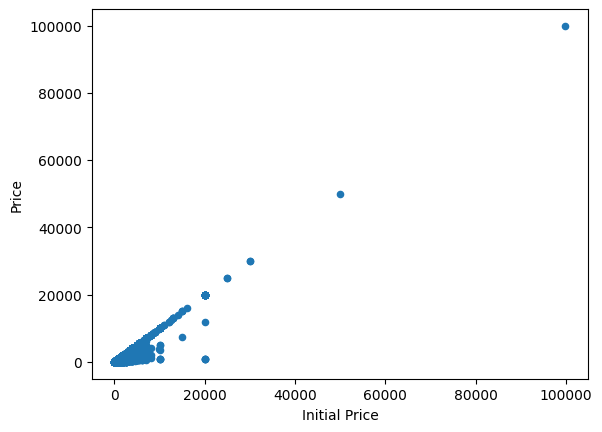

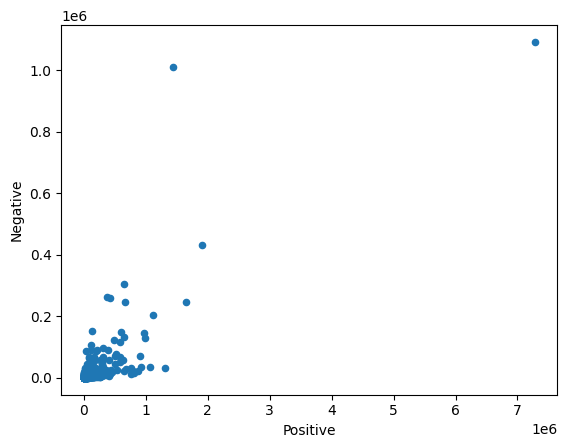

In [46]:
import matplotlib.pyplot as plt

data.plot(kind = 'scatter',x = 'Initial Price',y = 'Price')
data.plot(kind = 'scatter',x = 'Positive',y = 'Negative')
# data.plot(kind = 'scatter',x = 'Initial Price',y = 'Price')

<Axes: title={'center': 'Games with top positive'}, xlabel='Game Name'>

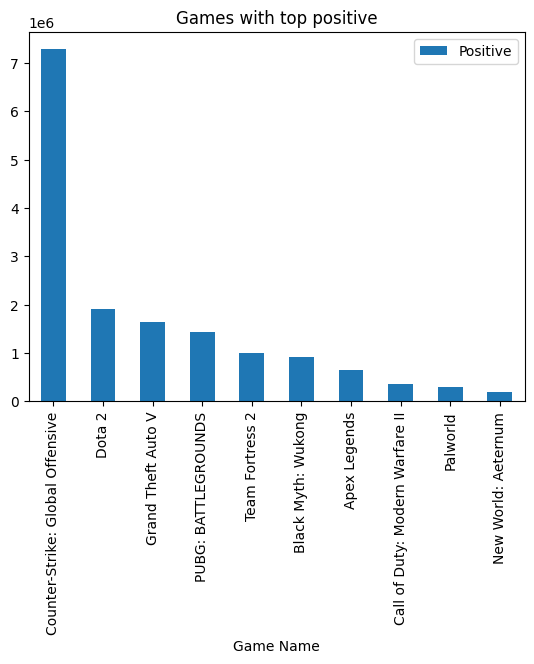

In [47]:
data_review = data.loc[data['Positive'] > 100000].head(10)
data_review_sorted = data_review.sort_values('Positive',ascending=False)
data_review_sorted.plot(kind = "bar",x = "Game Name", y="Positive", title = "Games with top positive")

#CSGO have the highest positive reviews on steams
#4 out of 10 games are made by or made with Valve custom game engine.
#This shows that CSGO is globally played by many players

<Axes: title={'center': 'Games with most negative'}, xlabel='Game Name'>

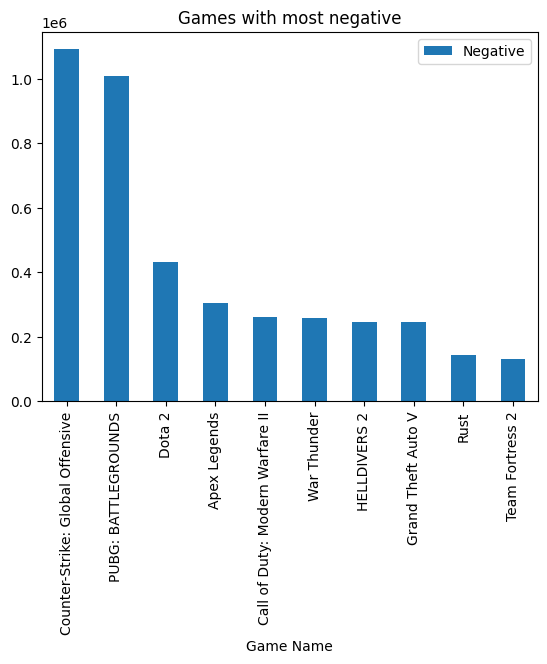

In [48]:
data_review = data.loc[data['Negative'] > 100000].head(10)
data_review_sorted = data_review.sort_values('Negative',ascending=False)
data_review_sorted.plot(kind = "bar",x = "Game Name", y="Negative", title = "Games with most negative")


#

<Axes: title={'center': 'Top 10 developers with quality products'}, xlabel='Developer'>

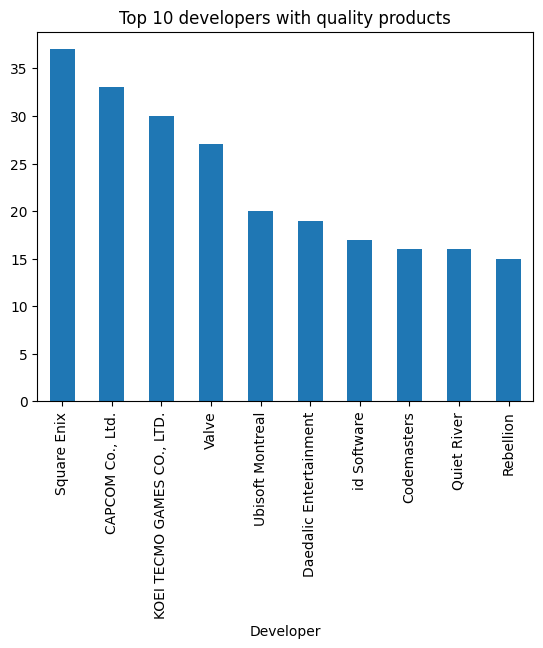

In [49]:
pd.set_option('display.max_rows', None)
count = data.groupby(['Developer','Range of Owners']).size().reset_index(name = 'Number of count')

min_limit = 100000
max_limit = 200000000

def lower_bounds(lower_count):
    lower_bound = lower_count.split('..')[0].replace(',','').strip()
    return int(lower_bound)

count['Lower Count'] = count['Range of Owners'].apply(lower_bounds)

filtered_count = count.loc[(count['Number of count']>=2) & (count['Lower Count']>=min_limit) & (count['Lower Count']<= max_limit)]

filtered_count[['Developer','Number of count']]

developers_top_products = filtered_count.groupby("Developer")['Number of count'].sum()

sort_values_products=developers_top_products.sort_values(ascending=False).head(10)

sort_values_products.plot(kind="bar",x="Developer",y="Number of Count", title = "Top 10 developers with quality products")

<Axes: title={'center': 'Top 10 Publisher with quality products'}, xlabel='Publisher'>

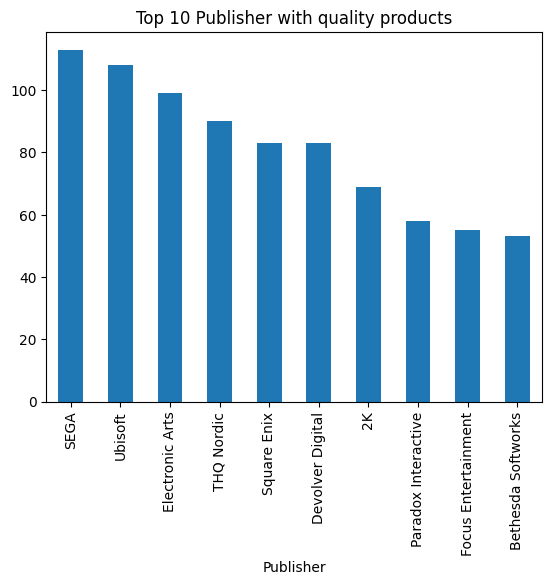

In [50]:
count = data.groupby(['Publisher','Range of Owners']).size().reset_index(name = 'Number of count')

min_limit = 100000
max_limit = 200000000

def lower_bounds(lower_count):
    lower_bound = lower_count.split('..')[0].replace(',','').strip()
    return int(lower_bound)

count['Lower Count'] = count['Range of Owners'].apply(lower_bounds)

filtered_count = count.loc[(count['Number of count']>=2) & (count['Lower Count']>=min_limit) & (count['Lower Count']<= max_limit)]

filtered_count[['Publisher','Number of count']]

publishers_top_products = filtered_count.groupby("Publisher")['Number of count'].sum()

sort_values_products=publishers_top_products.sort_values(ascending=False).head(10)

sort_values_products.plot(kind="bar",x="Publisher",y="Number of Count", title = "Top 10 Publisher with quality products")

In [51]:
data.to_csv('cleaned_steam_data.csv',index=False)
